## Δημιουργήσαμε τα αρχικά σήματα και τα εμφανίσαμε

C:\Users\kosti_0b5rpb8\anaconda3\envs\dsp_project1\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


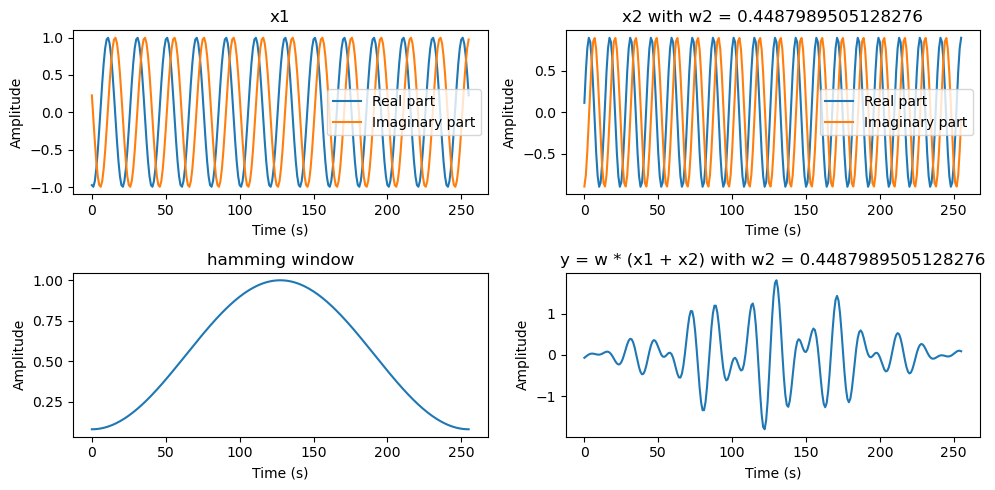

In [116]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from cmath import exp

# Initial values:
A1, A2 = 1, 0.9
L = 256
w1 = pi / 10
phi1, phi2 = np.random.uniform(0, 2 * pi), np.random.uniform(0, 2 * pi)

w2_arr = [pi / (7 + 0.5 * i) for i in range(6)]
for i in range(1, 10): w2_arr.append(pi / (9.5 + 0.05 * i))

x2_arr = np.array([[A2 * exp(1j * (w2 * n + phi2)) for n in range(L)] for w2 in w2_arr])

x1 = np.array([A1 * exp(1j * (w1 * n + phi1)) for n in range(L)])
w = np.hamming(L)

# C = A * B se np array to C θα έχει διαστάσεις του  A,B kai C[i] = A[i] * B[i] αντίστοιχα για το  +
y_arr = [w * (x1 + x2_arr[i]) for i in range(len(x2_arr))]

Ts = 1  # time interval between samples.
t = np.arange(0, L, Ts)

# Plot the signal
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

axs[0][0].plot(t, np.real(x1), label='Real part')
axs[0][0].plot(t, np.imag(x1), label='Imaginary part')
axs[0][0].set_xlabel('Time (s)')
axs[0][0].set_ylabel('Amplitude')
axs[0][0].set_title('x1')
axs[0][0].legend()

axs[0][1].plot(t, np.real(x2_arr[0]), label='Real part')
axs[0][1].plot(t, np.imag(x2_arr[0]), label='Imaginary part')
axs[0][1].set_xlabel('Time (s)')
axs[0][1].set_ylabel('Amplitude')
axs[0][1].set_title(f'x2 with w2 = {w2_arr[0]}')
axs[0][1].legend()

axs[1][0].plot(t, w)
axs[1][0].set_xlabel('Time (s)')
axs[1][0].set_ylabel('Amplitude')
axs[1][0].set_title('hamming window')

axs[1][1].plot(t, y_arr[0])
axs[1][1].set_xlabel('Time (s)')
axs[1][1].set_ylabel('Amplitude')
axs[1][1].set_title(f'y = w * (x1 + x2) with w2 = {w2_arr[0]}')

# Add spacing between subplots.
fig.tight_layout()

plt.show()

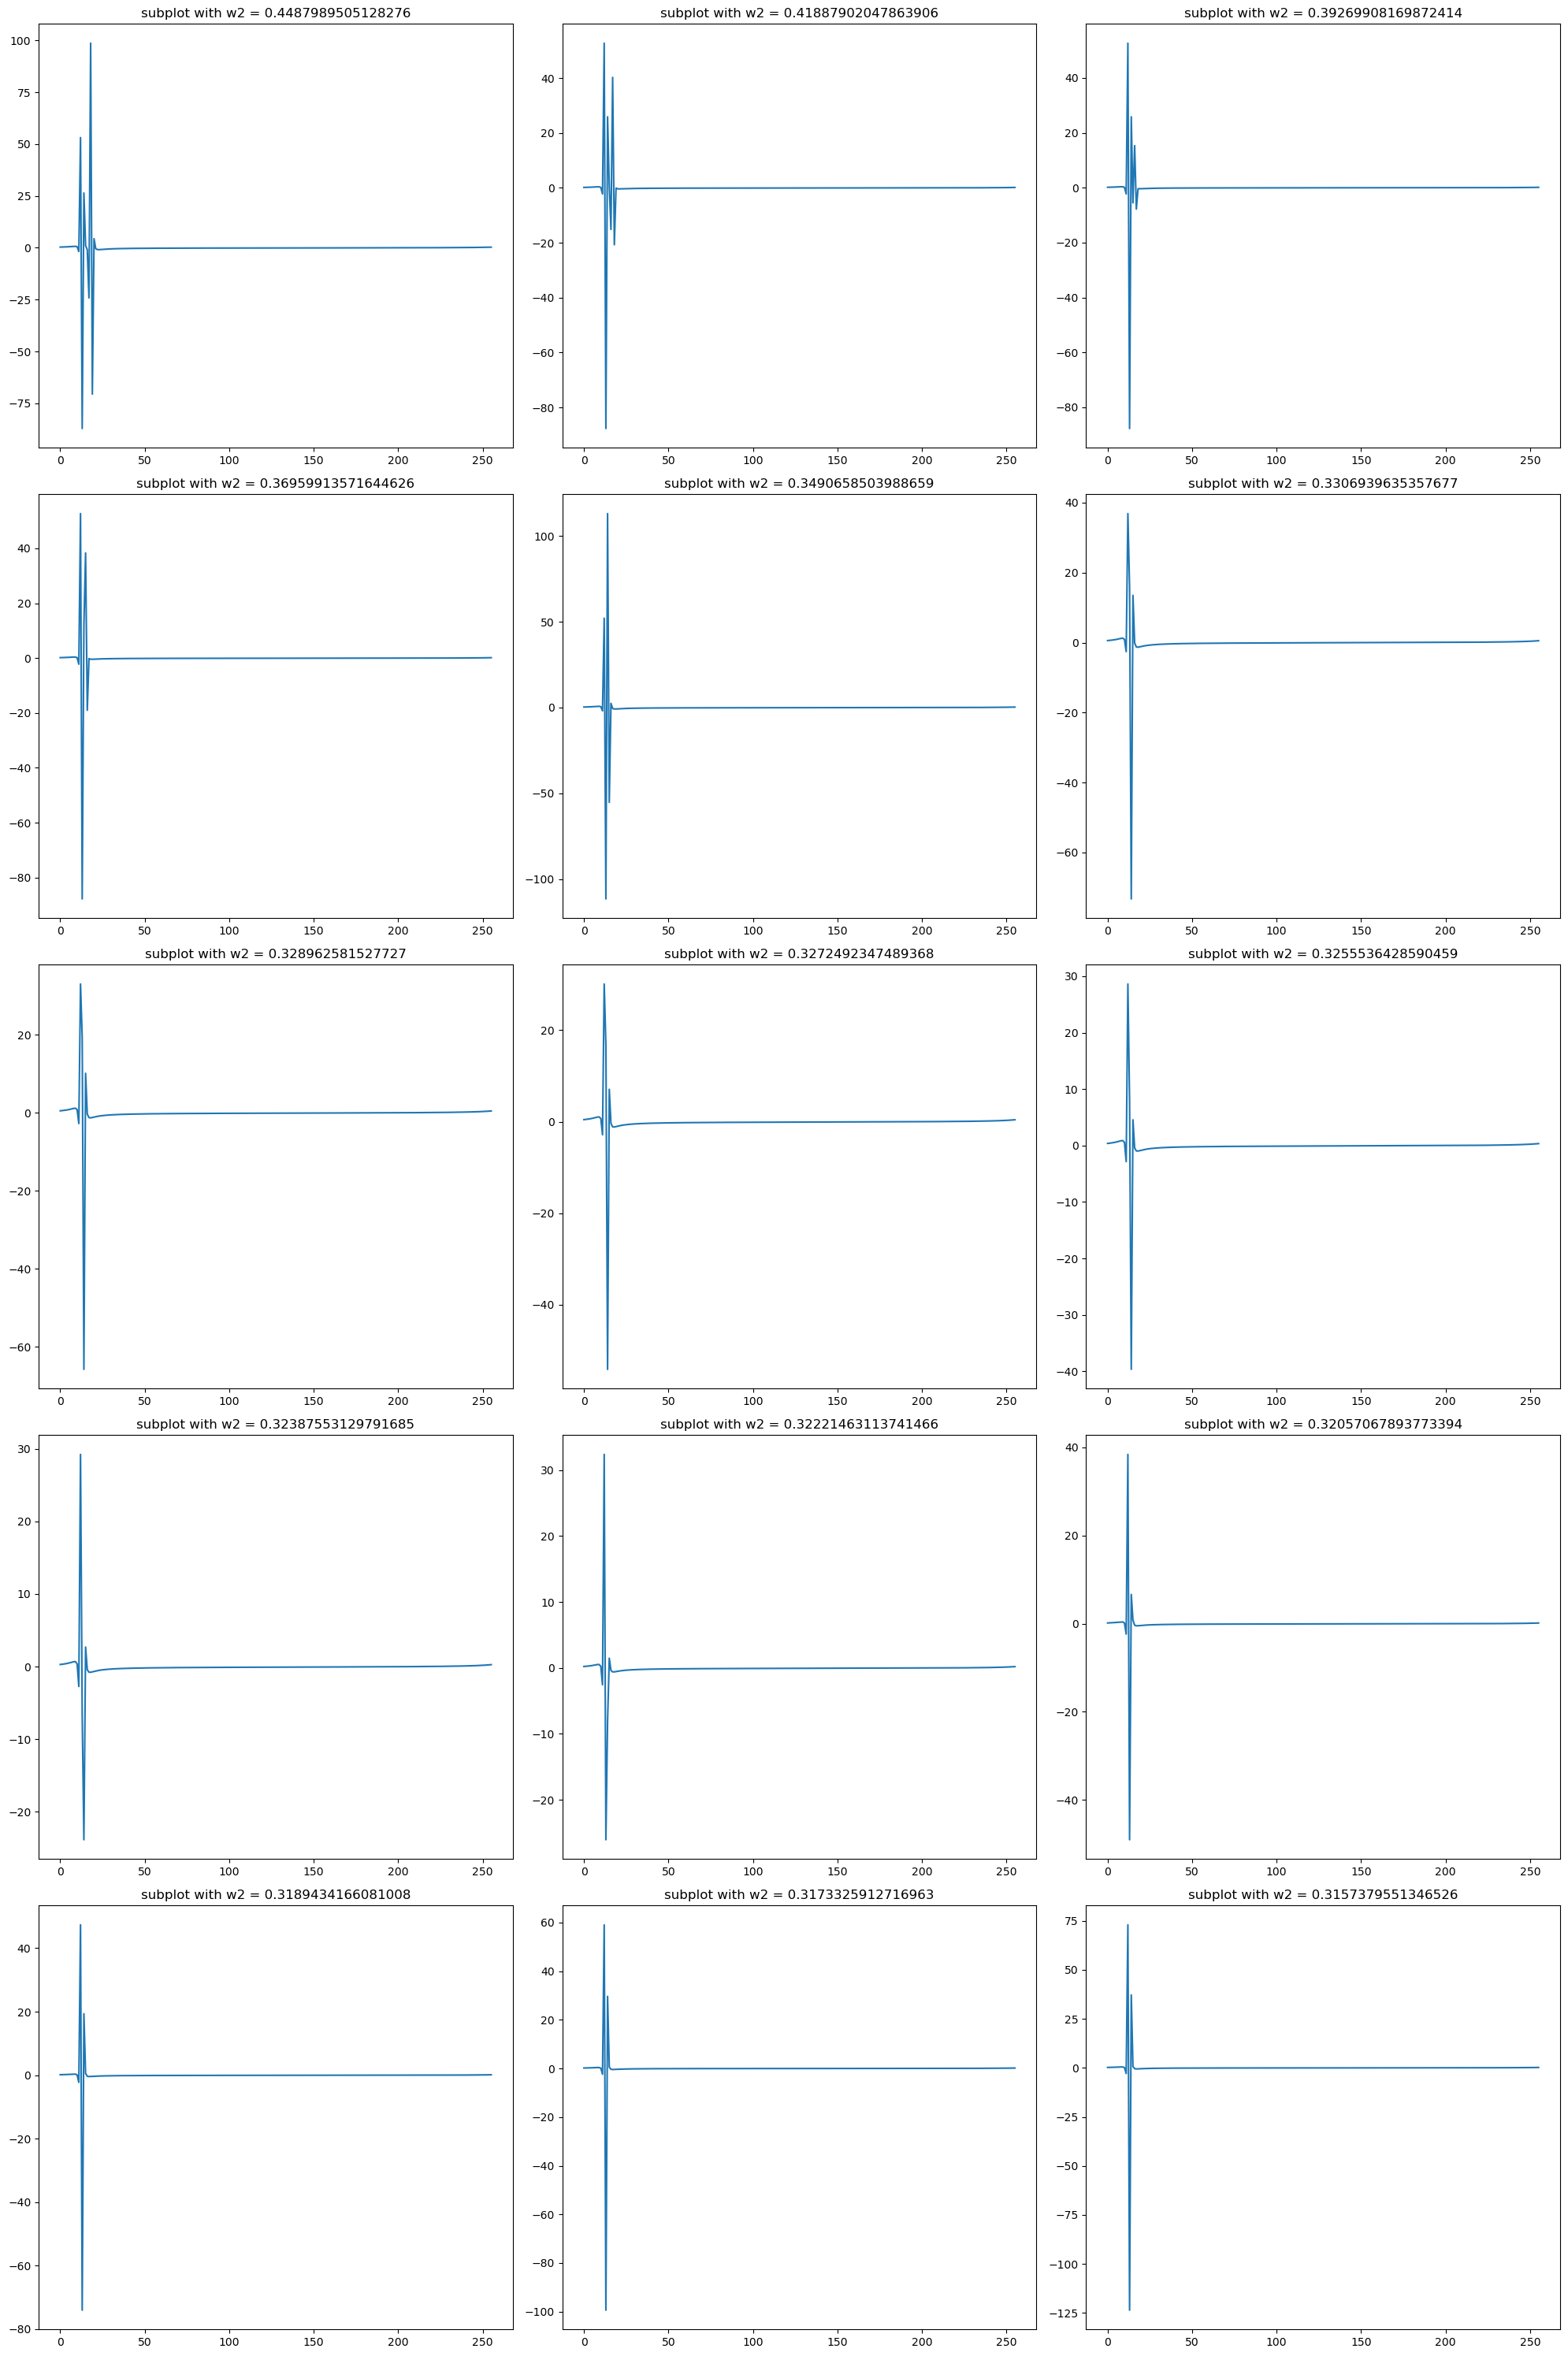

In [117]:
Y = [np.fft.fft(y) for y in y_arr]

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))

for i, ax in enumerate(axes.flat):  # the flat func makes the 2d array into a 1d
    ax.plot(Y[i], label='Y')
    ax.set_title(f'subplot with w2 = {w2_arr[i]}')

fig.tight_layout()

plt.show()

### 1.2 changing dft length

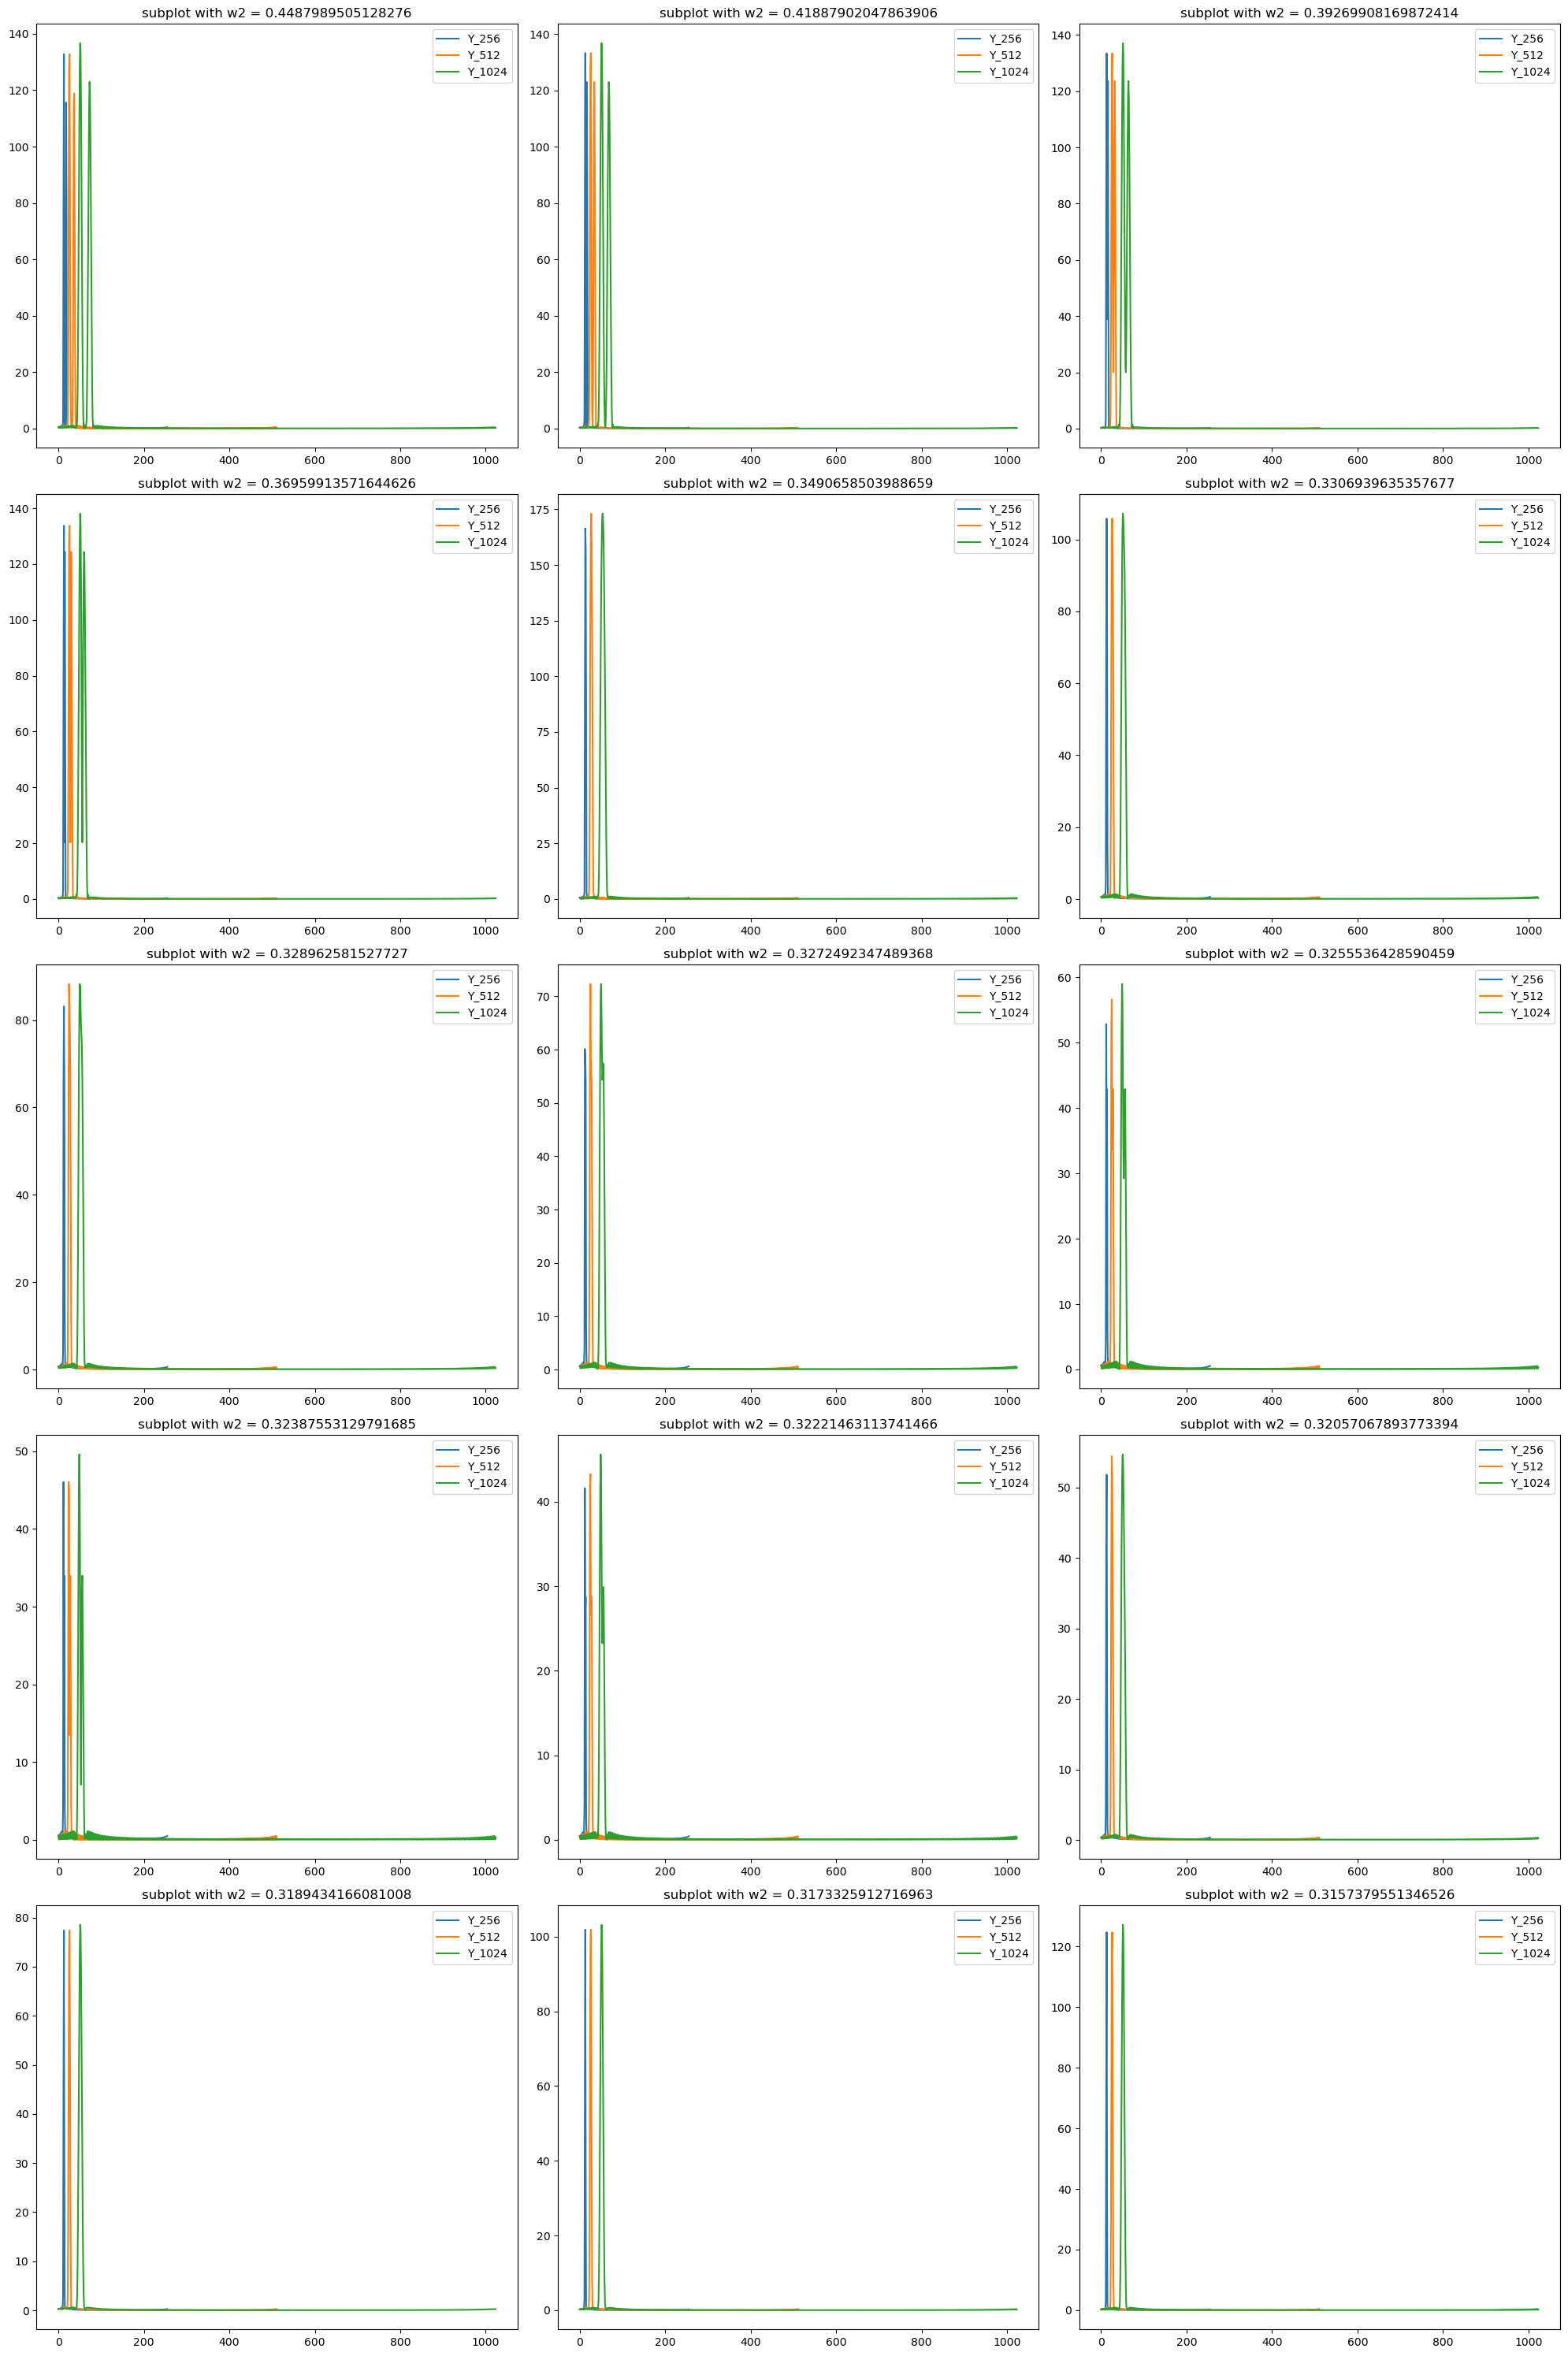

In [ ]:
y_512 = [np.append(y, np.zeros(256)) for y in y_arr]  # y = 1x256 -> 1x512
y_1024 = [np.append(y, np.zeros(256 + 512)) for y in y_arr]  # y = 1x256 -> 1x512
Y_512 = [np.fft.fft(y) for y in y_512]
Y_1024 = [np.fft.fft(y) for y in y_1024]

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 30))

for i, ax in enumerate(axes.flat):  # the flat func makes the 2d array into a 1d
    # ax.plot(X1, label='X1')
    # ax.plot(X2_arr[i], label='X2')
    ax.plot(np.abs(Y[i]), label='Y_256')
    ax.plot(np.abs(Y_512[i]), label='Y_512')
    ax.plot(np.abs(Y_1024[i]), label='Y_1024')
    ax.legend()
    ax.set_title(f'subplot with w2 = {w2_arr[i]}')

fig.tight_layout()

plt.show()

## 1.3 ίδιο με το 1.1 απλά αλλάζω length σήματος

Initialising signals

In [119]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from cmath import exp

# Initial values:
A1, A2 = 1, 0.9
L_512, L_1024 = 512, 1024
w1 = pi / 10
phi1, phi2 = np.random.uniform(0, 2 * pi), np.random.uniform(0, 2 * pi)

w2_arr = [pi / (9 + 0.05 * i) for i in range(20)]
threshold_512_zero_padding = 0.3696
w2_arr.append(threshold_512_zero_padding)
threshold_1024_zero_padding = 0.3491
w2_arr.append(threshold_1024_zero_padding)

x2_arr_512 = np.array([[A2 * exp(1j * (w2 * n + phi2)) for n in range(L_512)] for w2 in w2_arr])
x2_arr_1024 = np.array([[A2 * exp(1j * (w2 * n + phi2)) for n in range(L_1024)] for w2 in w2_arr])

x1_512 = np.array([A1 * exp(1j * (w1 * n + phi1)) for n in range(L_512)])
x1_1024 = np.array([A1 * exp(1j * (w1 * n + phi1)) for n in range(L_1024)])
w_512 = np.hamming(L_512)
w_1024 = np.hamming(L_1024)

# C = A * B se np array to C θα έχει διαστάσεις του  A,B kai C[i] = A[i] * B[i] αντίστοιχα για το  +
y_arr_512 = [w_512 * (x1_512 + x2_arr_512[i]) for i in range(len(x2_arr_512))]
y_arr_1024 = [w_1024 * (x1_1024 + x2_arr_1024[i]) for i in range(len(x2_arr_1024))]

Plotting dft

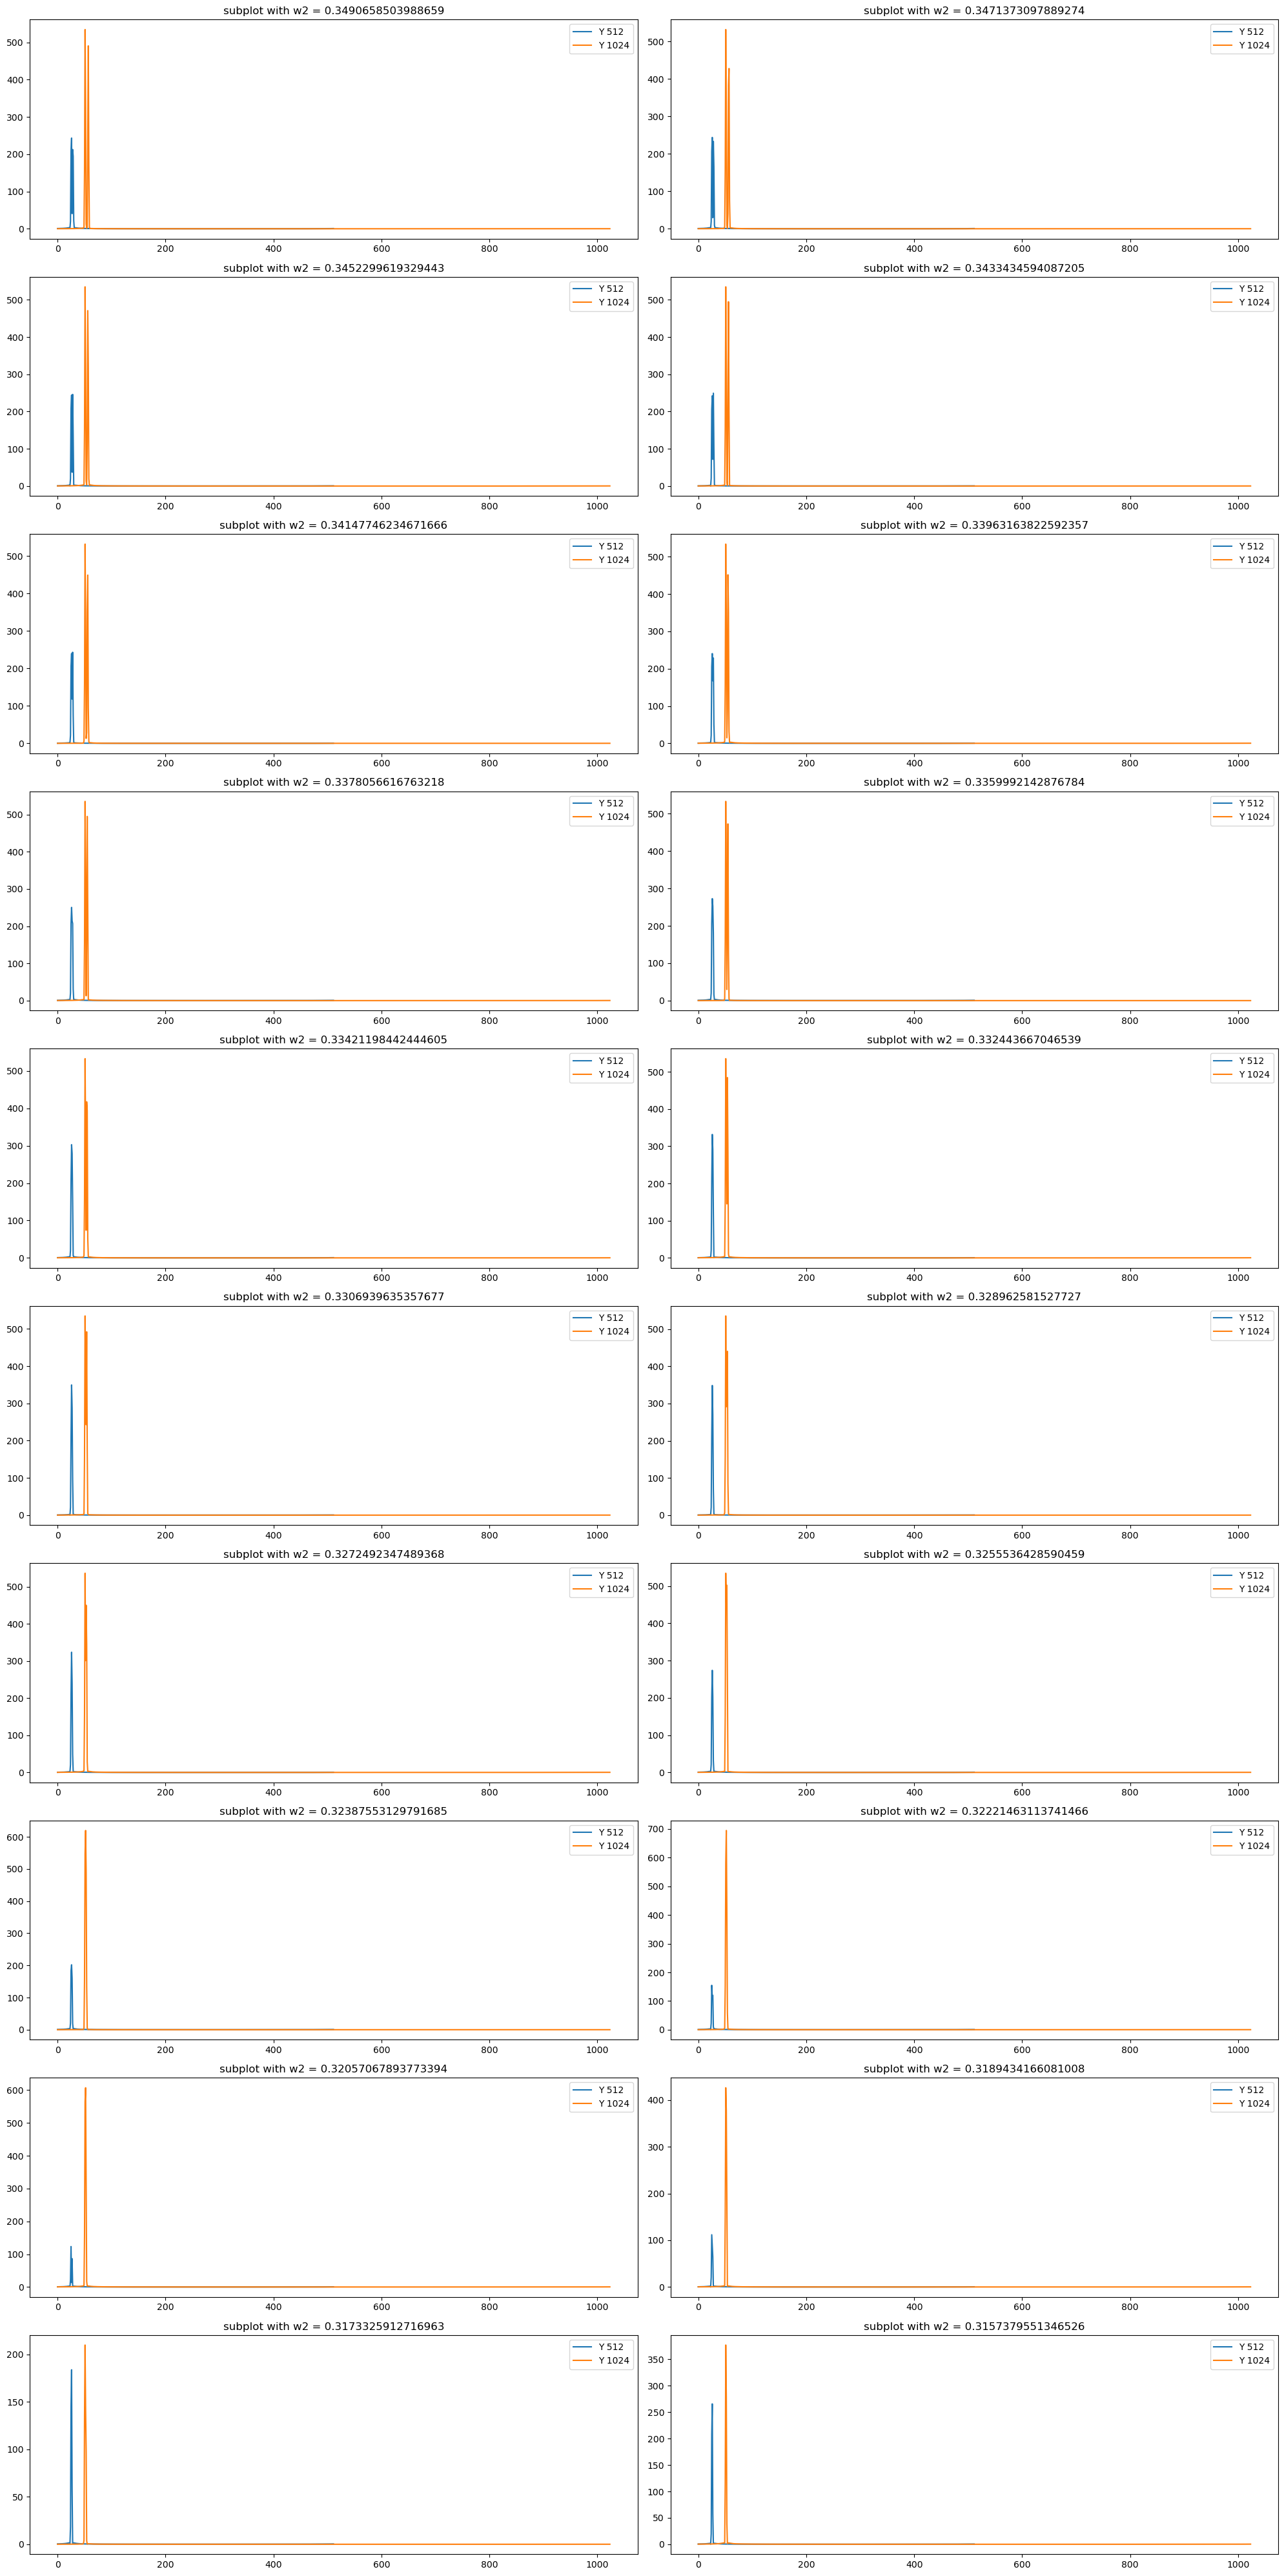

In [120]:
Y_512 = [np.fft.fft(y) for y in y_arr_512]
Y_1024 = [np.fft.fft(y) for y in y_arr_1024]

fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(20, 40))

for i, ax in enumerate(axes.flat):  # the flat func makes the 2d array into a 1d
    ax.plot(np.abs(Y_512[i]), label='Y 512')
    ax.plot(np.abs(Y_1024[i]), label='Y 1024')
    ax.legend()
    ax.set_title(f'subplot with w2 = {w2_arr[i]}')

fig.tight_layout()

plt.show()

Plotting 256 Threshold in 512 and 1024 samples

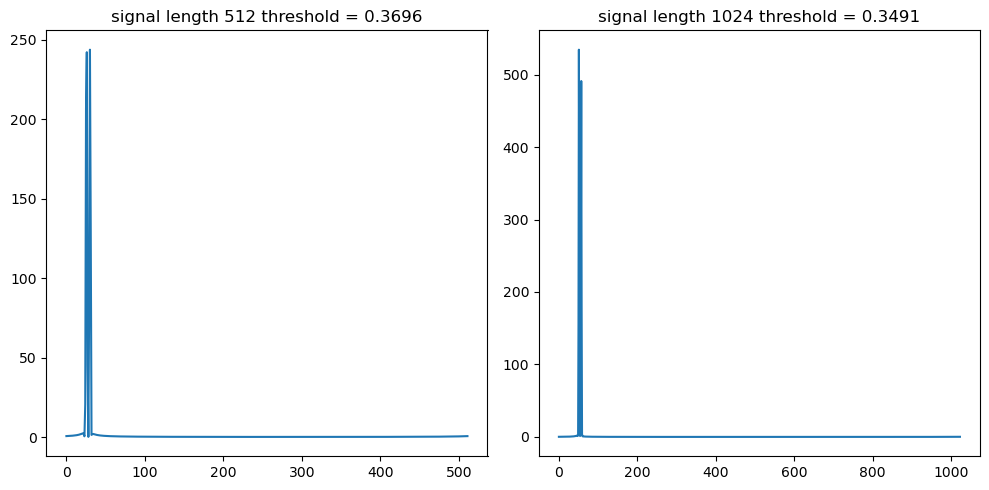

In [121]:
Y_512_with_512_zero_padding_threshold = np.fft.fft(y_arr_512[20])
Y_1024_with_1024_zero_padding_threshold = np.fft.fft(y_arr_1024[21])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].plot(np.abs(Y_512_with_512_zero_padding_threshold), label='Y 512')
axes[0].set_title(f'signal length 512 threshold = {w2_arr[20]}')
axes[1].plot(np.abs(Y_1024_with_1024_zero_padding_threshold), label='Y 1024')
axes[1].set_title(f'signal length 1024 threshold = {w2_arr[21]}')

fig.tight_layout()

plt.show()

## 1.4 Διαφορές Hamming - Rectangular window

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
from cmath import exp

# Initial values:
A1, A2 = 1, 0.05
L = 256
N = 1024
w1, w2 = 0.25 * pi, 0.3 * pi
phi1, phi2 = np.random.uniform(0, 2 * pi), np.random.uniform(0, 2 * pi)

x1 = np.array([A1 * exp(1j * (w1 * n + phi1)) for n in range(N)])
x2 = np.array([A2 * exp(1j * (w2 * n + phi2)) for n in range(N)])
w_hamm, w_rect = np.zeros(N), np.zeros(N)
w_rect[256:512], w_hamm[256:512] = 1, np.hamming(L)

# C = A * B se np array to C θα έχει διαστάσεις του  A,B kai C[i] = A[i] * B[i] αντίστοιχα για το  +
y_hamm = w_hamm * (x1 + x2)
y_rect = w_rect * (x1 + x2)

Ts = 1  # time interval between samples.
t = np.arange(0, N, Ts)

# Plot the signal
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 5))

axs[0][0].plot(t, np.real(x1), label='Real part')
axs[0][0].plot(t, np.imag(x1), label='Imaginary part')
axs[0][0].set_xlabel('Time (s)')
axs[0][0].set_ylabel('Amplitude')
axs[0][0].set_title('x1')
axs[0][0].legend()

axs[0][1].plot(t, np.real(x2), label='Real part')
axs[0][1].plot(t, np.imag(x2), label='Imaginary part')
axs[0][1].set_xlabel('Time (s)')
axs[0][1].set_ylabel('Amplitude')
axs[0][1].set_title('x2')
axs[0][1].legend()

axs[1][0].plot(t, w_hamm)
axs[1][0].set_xlabel('Time (s)')
axs[1][0].set_ylabel('Amplitude')
axs[1][0].set_title('hamming window')

axs[1][1].plot(t, w_rect)
axs[1][1].set_xlabel('Time (s)')
axs[1][1].set_ylabel('Amplitude')
axs[1][1].set_title('rectangular window')

axs[2][0].plot(t, y_hamm)
axs[2][0].set_xlabel('Time (s)')
axs[2][0].set_ylabel('Amplitude')
axs[2][0].set_title(f'y = w_hamming * (x1 + x2) ')

axs[2][1].plot(t, y_rect)
axs[2][1].set_xlabel('Time (s)')
axs[2][1].set_ylabel('Amplitude')
axs[2][1].set_title(f'y = w_rectangular * (x1 + x2) ')

# Add spacing between subplots.
fig.tight_layout()

plt.show()

In [ ]:
Y_hamm = np.abs(np.fft.fft(y_hamm))
Y_rect = np.abs(np.fft.fft(y_rect))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes[0].plot(Y_hamm)
axes[0].set_title('Y for hamming window')

axes[1].plot(Y_rect)
axes[1].set_title('Y for rectangular window')

fig.tight_layout()

plt.show()

# Άσκηση 2

### 2.1
**low freq for row, high freq for col**
<img src="button_frequencies_matrix.jpg">

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List
from IPython.display import Audio
from numpy import sin

# Table of frequencies:
L = 1000
Row_freq = [0.5346, 0.5906, 0.6535, 0.7217]
Col_freq = [0.9273, 1.0247, 1.1328]
btn_sounds = {"1": [sin(Row_freq[0] * n) + sin(Col_freq[0] * n) for n in range(L)],
              "2": [sin(Row_freq[0] * n) + sin(Col_freq[1] * n) for n in range(L)],
              "3": [sin(Row_freq[0] * n) + sin(Col_freq[2] * n) for n in range(L)],
              "4": [sin(Row_freq[1] * n) + sin(Col_freq[0] * n) for n in range(L)],
              "5": [sin(Row_freq[1] * n) + sin(Col_freq[1] * n) for n in range(L)],
              "6": [sin(Row_freq[1] * n) + sin(Col_freq[2] * n) for n in range(L)],
              "7": [sin(Row_freq[2] * n) + sin(Col_freq[0] * n) for n in range(L)],
              "8": [sin(Row_freq[2] * n) + sin(Col_freq[1] * n) for n in range(L)],
              "9": [sin(Row_freq[2] * n) + sin(Col_freq[2] * n) for n in range(L)],
              "0": [sin(Row_freq[3] * n) + sin(Col_freq[1] * n) for n in range(L)]
              }

display(Audio(btn_sounds["6"], rate=44100))

### 2.2

In [ ]:
btn_dfts = {}

# Compute the FFT of each sound signal and add it to the btn_dft dictionary
for btn, sound_signal in btn_sounds.items():
    sound_signal_padded = np.copy(sound_signal)
    sound_signal_padded = np.pad(sound_signal_padded, (0, 24), mode='constant', constant_values=0)
    btn_dfts[btn] = np.abs(np.fft.fft(sound_signal_padded))

# todo Να τα βάλω να βγαίνουν στην σειρά

plt.figure()
plt.plot(btn_dfts["1"], color='r')
plt.title('number 1')
plt.figure()
plt.plot(btn_dfts["4"], color='g')
plt.title('number 4')
plt.figure()
plt.plot(btn_dfts["8"])
plt.title('number 8')

plt.show()

Δεν ξέρω τι παρατηρώ :(...

### 2.3

In [ ]:
from scipy.io import wavfile

am, am_sound = '06240996', []
for digit in am:
    am_sound = np.concatenate([am_sound, btn_sounds[digit], np.zeros(100)])
am_sound = am_sound[:-100]  # to delete tail's zeros

am_sound_norm = np.int16(am_sound / np.max(np.abs(am_sound)) * 32767)

wavfile.write(filename='tone_sequence.wav', rate=44100, data=am_sound_norm)

display(Audio(am_sound, rate=44100))

### 2.4

In [ ]:
N = 1024
w_hamm, w_rect = np.zeros(N), np.zeros(N)
w_rect[:1000], w_hamm[:1000] = 1, np.hamming(L)



sig_len = len(am_sound_norm)
Digits_fourier = []
for i in range(0, sig_len, (1000 + 100)):
    am_sound_padded = np.copy(am_sound_norm[i:i + 1000])
    am_sound_padded = np.pad(am_sound_padded, (0, 24), mode='constant', constant_values=0)
    # make it 1024 with zero padding.
    Digits_fourier.append(np.abs(np.fft.fft(w_rect * am_sound_padded) ) )

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(40, 30))

for i, ax in enumerate(axes.flat):  # the flat func makes the 2d array into a 1d
    ax.plot(Digits_fourier[i])
    ax.set_title(f'{i}-th number')

### 2.5

In [ ]:
from scipy.spatial.distance import euclidean


# noinspection PyShadowingNames
def neighrest_btn(btns: dict, in_btn: list):
    distance_from_all_btns = [(btn, euclidean(in_btn, btn_dft)) for btn, btn_dft in btns.items()]  # : List[Tuple[btn_number, btn_Fourier]]
    distance_from_all_btns.sort(key=lambda x: x[1])  # sort based on distance not index
    return distance_from_all_btns[0][0]


Predicted_numbers = [neighrest_btn(btn_dfts, in_btn) for in_btn in Digits_fourier]
Predicted_numbers

### 2.6

In [ ]:
def ttdecode(signIn: List) -> List[float]:
    rect = np.zeros(1024)
    rect[:1000] = 1

    # Παίρνουμε τη φασματική απεικόνιση κάθε ψηφίου του σήματος προς ανάλυση.
    signIn_digits_dft = []

    i = 0
    while i < len(signIn):
        signIn_padded = np.copy(signIn[i:i + 1000])
        signIn_padded = np.pad(signIn_padded, (0, 24), mode='constant', constant_values=0)
        signIn_digits_dft.append(np.abs((np.fft.fft(rect * signIn_padded))) )

        # Αν πλάτος < 10% του μέσου πλάτους σήματος αγνόησε το
        average_amp = np.max(signIn[i:i+1000])

        while signIn[i + 1] < average_amp * 0.1:
            i += 1
        i += 1000

    # Επιστρέφουμε τα ψηφία απο το σήμα προς ανάλυση
    return [neighrest_btn(btn_dfts, in_btn) for in_btn in signIn_digits_dft]


digits_of_am_sound = ttdecode(am_sound_norm)
digits_of_am_sound

### 2.7

In [ ]:
easy_sig = np.load('dsp23_lab1_Data/easy_sig.npy')
medium_sig = np.load('dsp23_lab1_Data/medium_sig.npy')
hard_sig = np.load('dsp23_lab1_Data/hard_sig.npy')

In [ ]:
plt.plot(hard_sig)
# plt.xlim(990, 1300)
plt.show()

In [ ]:

easy_number = ttdecode(easy_sig)
medium_number = ttdecode(medium_sig)
hard_number = ttdecode(hard_sig)

easy_number, medium_number, hard_number

## Άσκηση 3

16000


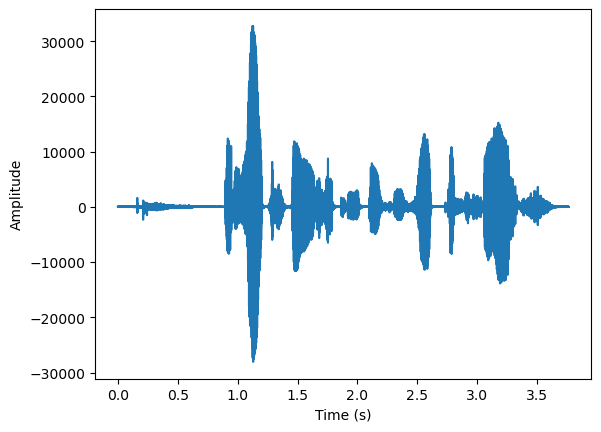

In [187]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Open the .wav file
wav_file = wave.open('dsp23_lab1_Data/speech_utterance_changed.wav', 'rb')

# Get the audio data
frames = wav_file.readframes(-1)
signal = np.frombuffer(frames, dtype='int16')

# Get the frame rate
fs = wav_file.getframerate()
print(fs)

# Get the time axis in seconds
time = np.linspace(0, len(signal) / fs, num=len(signal))

# Plot the waveform
plt.plot(time, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Cleanup
wav_file.close()

display(Audio(signal, rate=fs))

### Κόψαμε το θόρυβο (<2% του max)

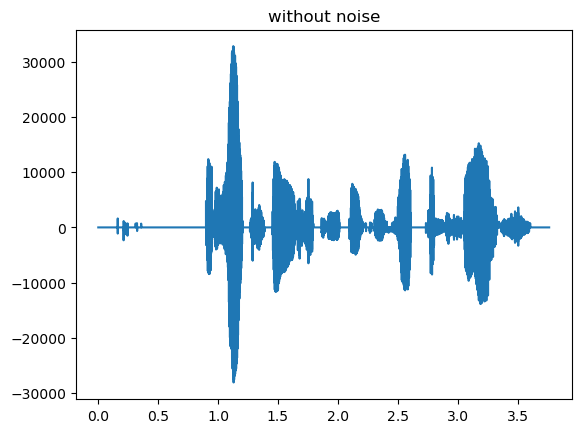

In [188]:
sig_max = max(signal)
_signal = np.copy(signal)
for i in range(len(signal)):
    if np.abs(_signal[i]) < sig_max*0.02:
        _signal[i] = 0

_signal = _signal.astype('float64')
plt.plot(time, _signal)
plt.title('without noise')
plt.show()

Text(0.5, 1.0, 'E with noise')

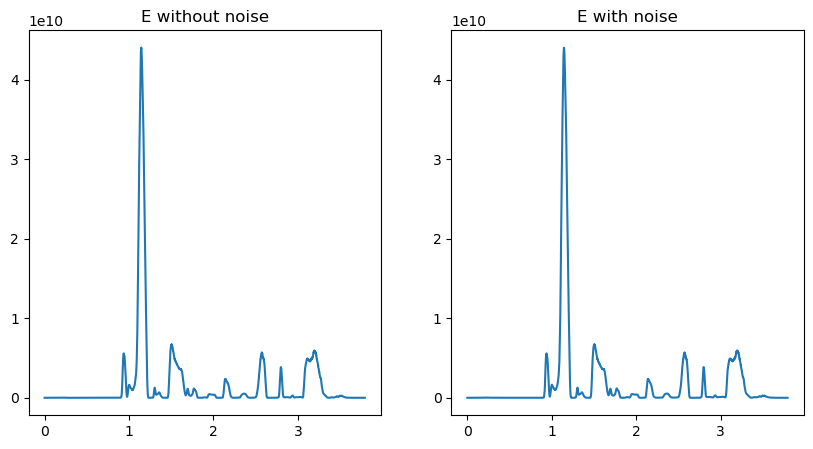

In [191]:
w = np.hamming(30 * 16)
E = np.convolve(np.square(_signal), w)
E_with_noise = np.convolve(np.square(signal.astype('float64')), w)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
E_time = np.linspace(0,len(E)/fs, len(E))
ax1.plot(E_time, E)
ax1.set_title('E without noise')
ax2.plot(E_time, E_with_noise)
ax2.set_title('E with noise')

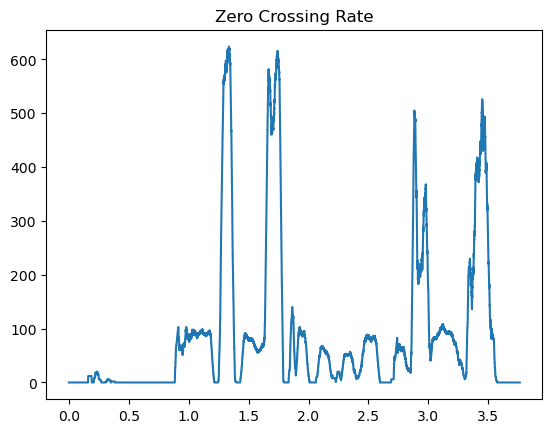

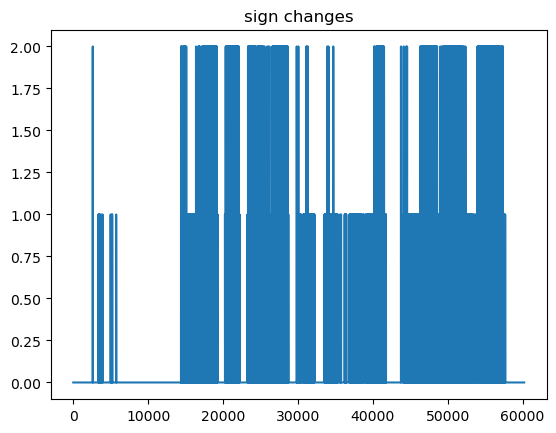

In [193]:
sign_changes = np.abs([np.sign(_signal[m]) - np.sign(_signal[m-1]) for m in range(len(_signal))])

w = np.zeros(1024)
w[:480] = 1  # 30ms window
Z = np.convolve(sign_changes, w)
Z_time = np.linspace(0,len(signal)/fs, len(Z))
plt.plot(Z_time, Z)
plt.title('Zero Crossing Rate')
plt.figure()
plt.plot(sign_changes)
plt.title('sign changes')

plt.show()

3.3

[ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  7.58330476e+03-4.22157067e+03j -1.33316272e+03+1.30378575e+04j
  6.32574005e+02-3.72520400e+02j  1.03267230e+02+4.44022608e+02j
  6.44741762e+03+1.32474557e+04j  0.00000000e+00+0.00000000e+00j
  3.14361541e+04-8.03541045e+03j  6.15620255e+04+5.27385574e+03j
  3.12499998e+04-1.63133402e+03j  3.12499981e+04+7.47943132e+04j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.000000

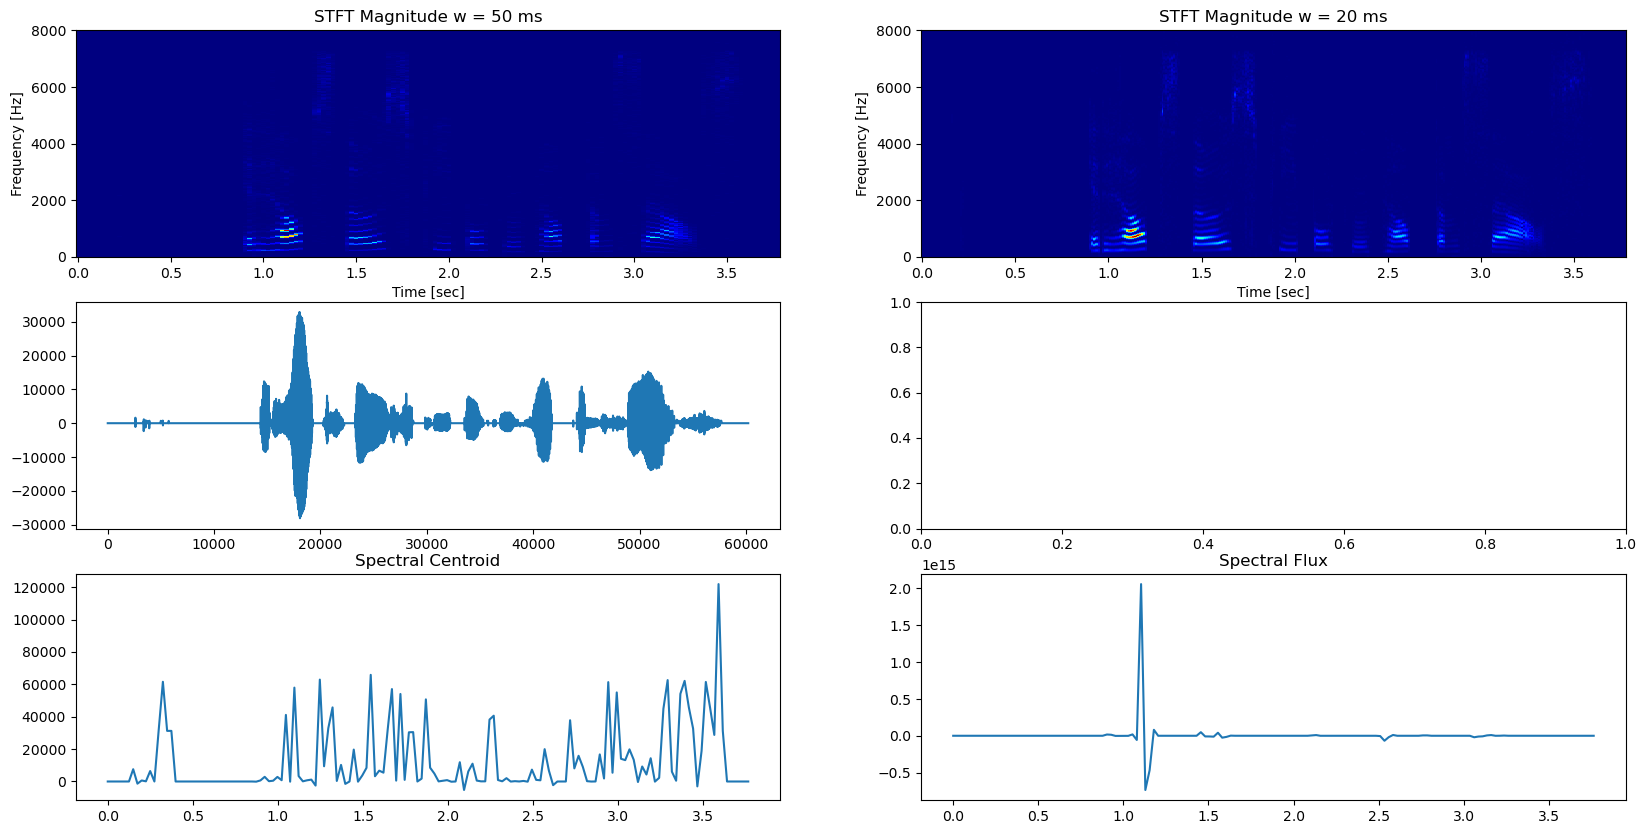

In [196]:
#stft
from scipy.signal import stft

fs = 16000
win = int(50 * fs / 1000) # 50 ms window

# compute the stft
f, t, Zxx = stft(_signal, fs=fs, window='hann', nperseg=win, nfft=2048)


fig, ax = plt.subplots(3,2,figsize=(20, 10))

# plot the stft
ax[0][0].pcolormesh(t,f,np.abs(Zxx), cmap='jet')
ax[0][0].set_title(f'STFT Magnitude w = {50} ms')
ax[0][0].set_ylabel('Frequency [Hz]')
ax[0][0].set_xlabel('Time [sec]')


#compute magnitude-squared stft
Zxx_mag = np.square(Zxx)


# compute the stft
f, t, Zxx = stft(_signal, fs=fs, window='hann', nperseg=20 * fs / 1000, nfft=2048)

# plot the stft
ax[0][1].pcolormesh(t,f,np.abs(Zxx), cmap='jet')
ax[0][1].set_title(f'STFT Magnitude w = {20} ms')
ax[0][1].set_ylabel('Frequency [Hz]')
ax[0][1].set_xlabel('Time [sec]')

# compute spectral centroid
nfft = 2048

eps =1e-8
f_c = (np.sum(f[:, np.newaxis] * Zxx_mag, axis = 0) / (np.sum(Zxx_mag, axis=0) + eps)) * (fs/nfft)
f_c_time = np.linspace(0, len(signal) / fs, num=len(f_c))

print(f_c)
ax[2][0].plot(f_c_time, f_c)
ax[2][0].set_title('Spectral Centroid')

s_f = np.sum(np.square(np.diff(Zxx_mag, axis=1)), axis=0)
s_f_time = np.linspace(0, len(signal) / fs, num=len(s_f))


print(s_f)
ax[2][1].plot(s_f_time, s_f)
ax[2][1].set_title('Spectral Flux')


ax[1][0].plot(_signal)



plt.show()

### 3.4

STEREO -> MONO

In [197]:
import wave
import struct
import numpy as np
import matplotlib.pyplot as plt


wav_file = wave.open('dsp23_lab1_Data/music_changed_changed.wav', 'rb')

sample_width = wav_file.getsampwidth()
nframes = wav_file.getnframes()
frames = wav_file.readframes(nframes)
nchannels = wav_file.getnchannels()
framerate = wav_file.getframerate()

# convert to mono

mono_frames = struct.pack('<{}h'.format(nframes), *[int.from_bytes(frames[i:i+sample_width], 'little', signed=True)//2 + int.from_bytes(frames[i+sample_width:i+2*sample_width], 'little', signed=True)//2 for i in range(0, len(frames), sample_width * nchannels)])

# Create output file for writing
with wave.open('music_mono.wav', 'wb') as output_wav:
    # Set parameters for mono audio
    output_wav.setnchannels(1)
    output_wav.setsampwidth(sample_width)
    output_wav.setframerate(framerate)

    # Write mono audio to output file
    output_wav.writeframes(mono_frames)

# Cleanup
wav_file.close()

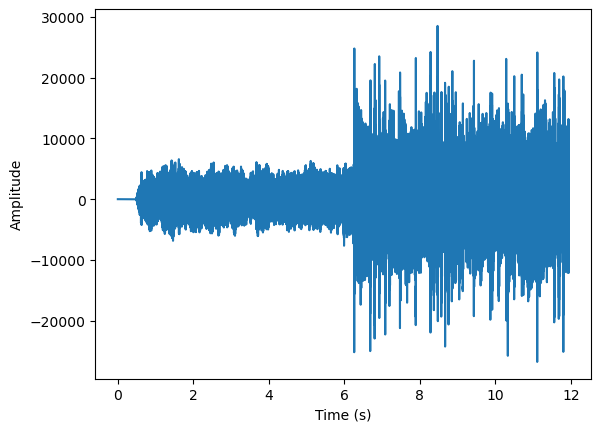

In [201]:
wav_file = wave.open('music_mono.wav','rb')
frames = wav_file.readframes(nframes)

# Get the audio data.
music = np.frombuffer(frames, dtype='int16')
fs = wav_file.getframerate()


wav_file.close()

# Get the time axis in seconds
time = np.linspace(0, len(music) / fs, num=len(music))

# Plot the waveform
plt.plot(time, music)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Cleanup
wav_file.close()

display(Audio(music, rate=fs))

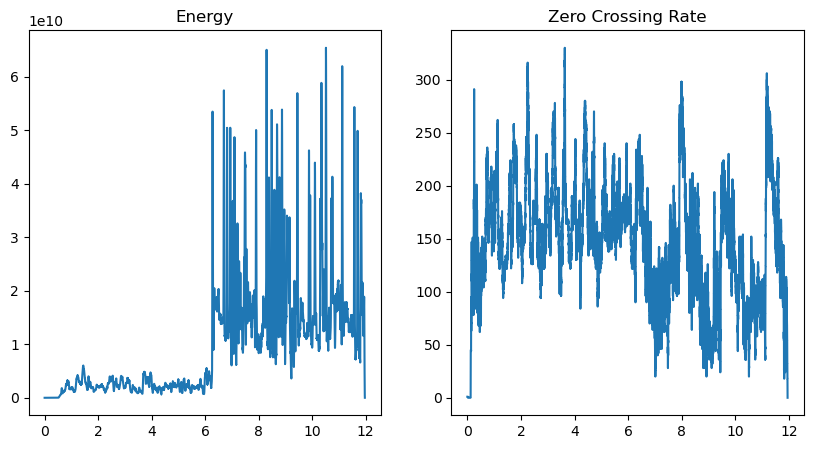

In [202]:
w = np.hamming(30 * fs / 1000) # 30 ms
E = np.convolve(np.square(music.astype('float64')), w)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Energy.
E_time = np.linspace(0,len(E)/fs, len(E))
ax[0].plot(E_time, E)
ax[0].set_title('Energy')

# Zero Crossing Rate
sign_changes = np.abs([np.sign(music[m]) - np.sign(music[m-1]) for m in range(len(music))])
w = np.zeros(1024)
w[:30 * fs // 1000] = 1  # 30ms window
Z = np.convolve(sign_changes, w)

Z_time = np.linspace(0,len(music)/fs, len(Z))
ax[1].plot(Z_time, Z)
ax[1].set_title('Zero Crossing Rate')

plt.show()

C:\Users\kosti_0b5rpb8\AppData\Local\Temp\ipykernel_12024\836025088.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
  Zxx_mag = np.square(Zxx.astype('float64'))


[    0.             0.             0.             0.
     0.             0.             0.         10740.75127365
  4640.80165691  4351.28805714  8002.58182719  9220.5801907
 15224.2188525  14694.20318541  6401.84352454  3322.10819041
 15703.34561871 16596.96056117 12878.02461949  8690.8262315
  4767.86135949  6351.20891361 10390.52665713 14444.63922533
  8986.33233146  7427.49399617  8791.26163781  5661.23780768
  9474.67097494 10338.05653989 11250.95859654  6230.99039961
 11988.83766585 19857.90670072 22589.63331322 32269.80160709
 29437.89648036 26205.24262412 26897.39708068 29540.15170709
 30877.34551636 30047.86772506 32794.23563354 31563.94121884
 33733.71398331 39896.2496072  44863.259305   41923.02746849
 56077.2196052  53027.52070512 52667.76281161 46551.97100324
 44405.08984714 44748.09480131 40677.72908562 40508.70988024
 39265.01464832 39789.19054728 45170.27951685 48253.27043141
 44114.78897931 33699.87322908 38595.65433578 30919.86914478
 33056.47326429 35421.6049101  434

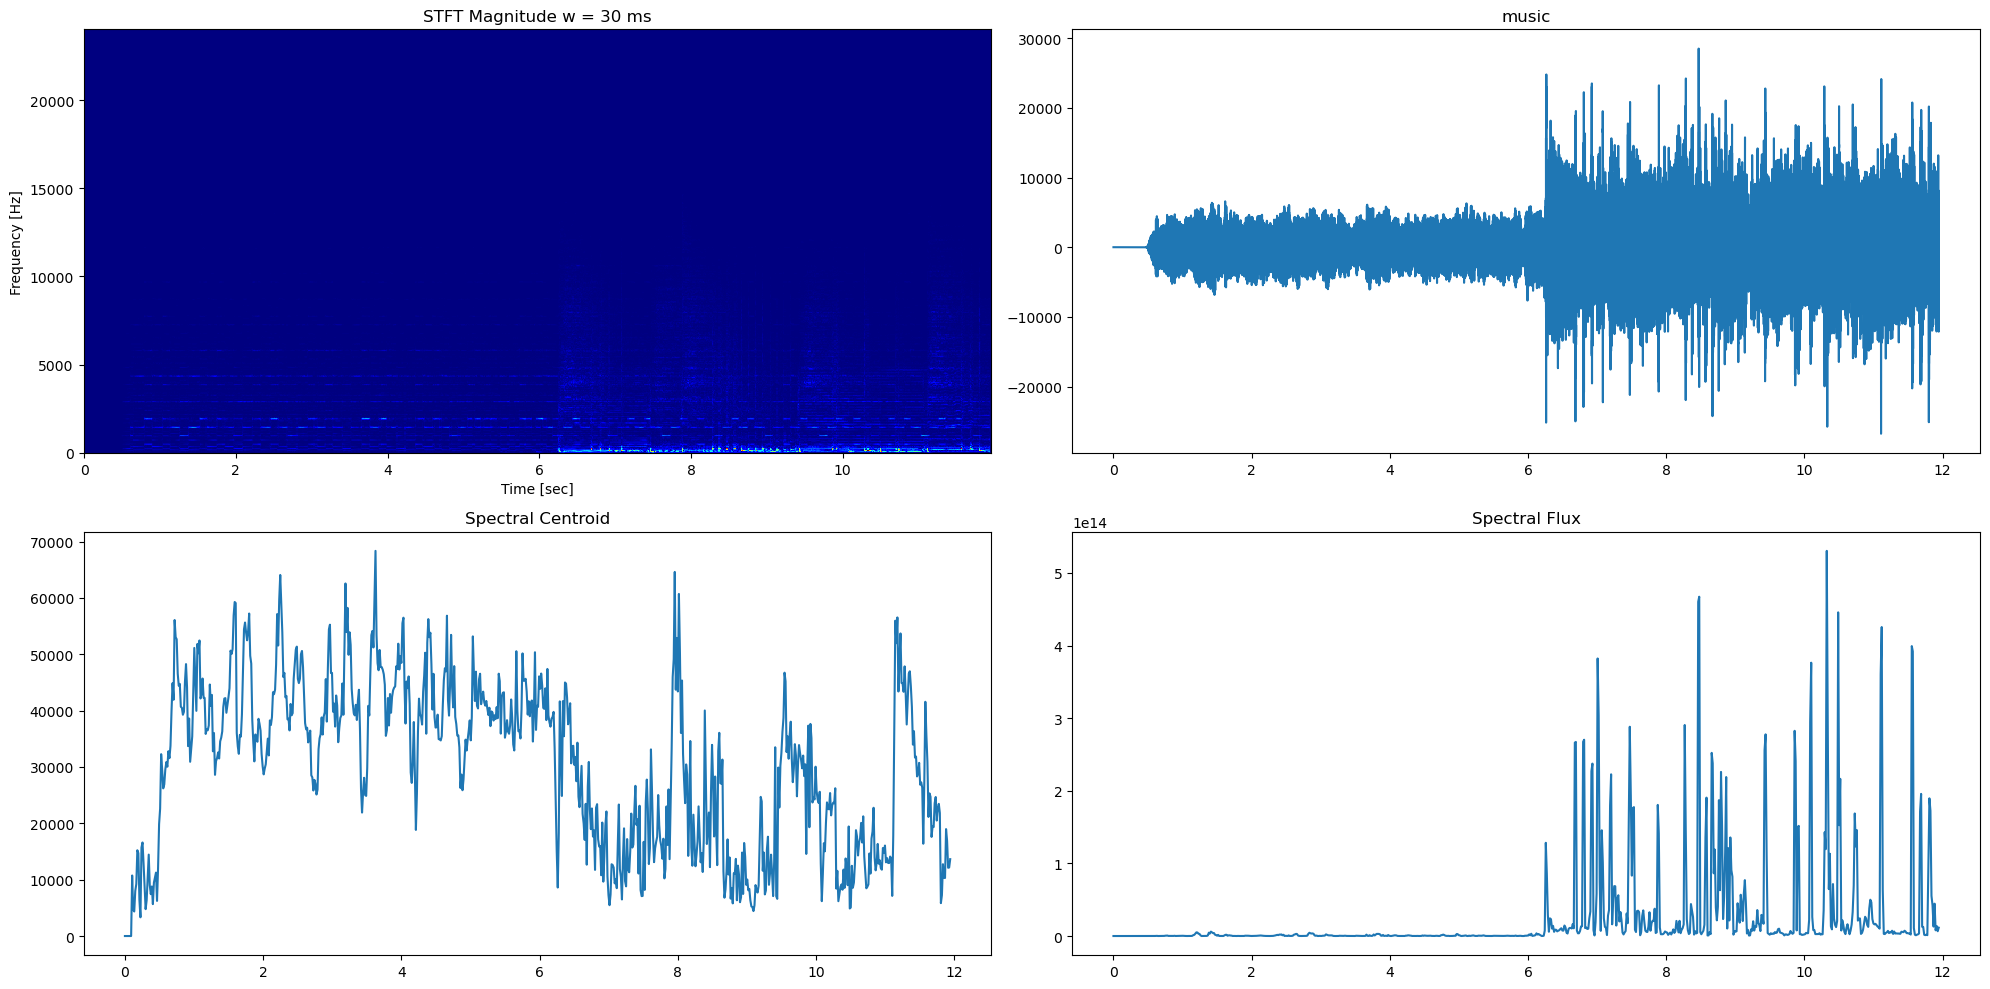

In [206]:
# STFT and Spectral Centroid and Flux
#stft
from scipy.signal import stft

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

win = int(30 * fs / 1000) # 30 ms window
nfft = 2048
f, t, Zxx = stft(music, fs=fs, window='hann', nperseg=win, nfft=nfft)

ax[0][0].pcolormesh(t,f,np.abs(Zxx), cmap='jet')
ax[0][0].set_title(f'STFT Magnitude w = 30 ms')
ax[0][0].set_ylabel('Frequency [Hz]')
ax[0][0].set_xlabel('Time [sec]')

ax[0][1].plot(time, music)
ax[0][1].set_title('music')

#compute magnitude-squared stft
Zxx_mag = np.square(Zxx.astype('float64'))

# compute spectral centroid
eps =1e-8
f_c = (np.sum(f[:, np.newaxis] * Zxx_mag, axis = 0) / (np.sum(Zxx_mag, axis=0) + eps)) * (fs/nfft)
f_c_time = np.linspace(0, len(music) / fs, num=len(f_c))

print(f_c)
ax[1][0].plot(f_c_time, f_c)
ax[1][0].set_title('Spectral Centroid')

s_f = np.sum(np.square(np.diff(Zxx_mag, axis=1)), axis=0)
s_f_time = np.linspace(0, len(music) / fs, num=len(s_f))


print(s_f)
ax[1][1].plot(s_f_time, s_f)
ax[1][1].set_title('Spectral Flux')

fig.tight_layout()

plt.show()